Each year need to generate the following. Get the latest Teams.csv and put it in the data folder, and make a new folder for the year. Put the following files there:


In [1]:
import numpy as np
import pandas as pd

year = '2015'

def getID(row):
    if isinstance(row['Team'], list):
        IDs = []
        for team in row['Team']:
            try:
                IDs.append(teamids.loc[teamids['TeamName'] == team, 'TeamID'].values[0])
            except:
                print("No match for {0}".format(team))
                IDs.append(0)
        return IDs
    else:
        try:
            ID = teamids.loc[teamids['TeamName'] == row['Team'], 'TeamID'].values[0]
        except:
            print("No match for {0}".format(row['Team']))
            ID = 0
        return ID

def getseed(name, ID):
    seed = 0
    if 'Playin' in name:
        return seed
    try:
        seedstring = seedsdf.loc[seedsdf['TeamID'] == ID, 'Seed'].values[0]
        if len(seedstring) == 3:
            seed = int(seedstring[1:]) # just drop first letter for conference
        elif len(seedstring) == 4:
            seed = int(seedstring[1:-1]) # playin has letter at the end too to remove
        else:
            raise AttributeError("Seed string for {0} wasn't 3 or 4 letters. Check seeds file".format(name))
    except:
        raise AttributeError("No match for {0} getting seed. Draft file needs to be generated correctly".format(name))
    return seed
    
def getseeds(row):
    if isinstance(row['TeamID'], list):
        names, IDs = row
        seeds = []
        for name, ID in zip(names, IDs):
            seeds.append(getseed(name, ID))
        return seeds
    else:
        return getseed(row['Team'], row['TeamID'])
        
teamids = pd.read_csv('data/Teams.csv')
seedsdf = pd.read_csv('data/NCAATourneySeeds.csv')
seedsdf = seedsdf[seedsdf['Season'] == int(year)]
seedsdf.tail()

,Season,Seed,TeamID
2009,2015,Z12,1459
2010,2015,Z13,1217
2011,2015,Z14,1209
2012,2015,Z15,1411
2013,2015,Z16,1157


In [2]:
teamids[np.array(['NC' in name for name in teamids['TeamName']])]

,TeamID,TeamName,FirstD1Season,LastD1Season
198,1299,NC A&T,1985,2019
199,1300,NC Central,2008,2019
200,1301,NC State,1985,2019
320,1421,UNC Asheville,1987,2019
321,1422,UNC Greensboro,1992,2019
322,1423,UNC Wilmington,1985,2019


# brackets.csv

Consists of the 64 tourney teams, with playin teams labeled as Playin1-4, in bracket order (top left, then bottom left, then top right, then bottom right), followed by the 8 playin teams, in order (first two teams are top left playin team, next two bottom left, next two top right, next two bottom left)

In [3]:
bracket = ['Kentucky', 'Playin1', 'Cincinnati', 'Purdue', 'West Virginia', 'Buffalo', 'Maryland', 'Valparaiso', 'Butler', 'Texas', 'Notre Dame', 'Northeastern', 'Wichita St', 'Indiana', 'Kansas', 'New Mexico St']
bracket += ['Wisconsin', 'Coastal Car', 'Oregon', 'Oklahoma St', 'Arkansas', 'Wofford', 'North Carolina', 'Harvard', 'Xavier', 'Playin2', 'Baylor', 'Georgia St', 'VA Commonwealth', 'Ohio St', 'Arizona', 'TX Southern']
bracket += ['Villanova', 'Lafayette', 'NC State', 'LSU', 'Northern Iowa', 'Wyoming', 'Louisville', 'UC Irvine', 'Providence', 'Playin3', 'Oklahoma', 'Albany NY', 'Michigan St', 'Georgia', 'Virginia', 'Belmont']
bracket += ['Duke', 'Playin4', 'San Diego St', "St John's", 'Utah', 'SF Austin', 'Georgetown', 'E Washington', 'SMU', 'UCLA', 'Iowa St', 'UAB', 'Iowa', 'Davidson', 'Gonzaga', 'N Dakota St']
playins = ['Manhattan', 'Hampton', 'BYU', 'Mississippi', 'Dayton', 'Boise St', 'North Florida', 'Robert Morris']
bracket += playins
bracket = pd.DataFrame(bracket, columns=['Team'])
bracket['TeamID'] = bracket.apply(getID, axis=1)
print("All team names successfully matched to IDs = {0}".format((bracket['TeamID'] == 0).sum() == 4))
bracket['Seed'] = bracket.apply(getseeds, axis=1)
bracket.tail()

No match for Playin1
No match for Playin2
No match for Playin3
No match for Playin4
All team names successfully matched to IDs = True


,Team,TeamID,Seed
67,Mississippi,1279,11
68,Dayton,1173,11
69,Boise St,1129,11
70,North Florida,1316,16
71,Robert Morris,1352,16


In [4]:
draft = ['Villanova', 'SF Austin', 'Arizona', 'Ohio St', 'Davidson', 'Notre Dame', 'Arkansas', 'Michigan St', 'Northern Iowa']
draft += ['Oklahoma', 'Providence', "St John's", 'Baylor', 'Indiana']
field = ['Manhattan', 'Hampton', 'Valparaiso', 'Northeastern', 'New Mexico St', 'Coastal Car', 'Harvard', 'Georgia St', 'TX Southern', 'Lafayette', 'UC Irvine', 'Albany NY', 'Belmont', 'Robert Morris', 'North Florida', 'E Washington', 'UAB', 'N Dakota St']
draft += [field]
draft += ['Virginia', ['Dayton', 'Boise St'], 'VA Commonwealth', 'Texas', 'Utah', 'Kentucky']
draft += ['San Diego St', 'Iowa', 'Louisville', 'Iowa St', 'Wyoming', 'Xavier', 'Purdue', 'Kansas']
draft += ['Georgia', ['Mississippi', 'BYU'], 'LSU', 'Butler', 'SMU', 'Maryland', 'Wisconsin']
draft += ['NC State', 'North Carolina', 'Georgetown', 'Buffalo', 'West Virginia', 'Wichita St']
draft += ['Gonzaga', 'Oregon', 'Oklahoma St', 'Cincinnati', 'Wofford', 'Duke', 'UCLA']
draft = pd.DataFrame(draft, columns=['Team'])
draft['TeamID'] = draft.apply(getID, axis=1)
draft['Seed'] = draft.apply(getseeds, axis=1)
draft.tail()

,Team,TeamID,Seed
44,Oklahoma St,1329,9
45,Cincinnati,1153,8
46,Wofford,1459,12
47,Duke,1181,1
48,UCLA,1417,11


Check for errors matching the IDs in the Kaggle submission file

In [5]:
sub = pd.read_csv(year+'/SampleSubmission.csv', index_col=0)
# drop playins from bracket
bracketnoplayins = bracket[np.array(['Playin' not in name for name in bracket['Team']])]
ids = pd.Series([int(code.split('_')[1]) for code in sub.index] + [int(code.split('_')[2]) for code in sub.index]).unique()
ids2 = bracketnoplayins['TeamID']
ids2 = ids2.sort_values().values
if (ids == ids2).sum() == len(ids):
    print('Manually inputted playins and regular teams matches kaggle submission file')

Manually inputted playins and regular teams matches kaggle submission file


In [20]:
def dollartofloat(row):
    return float(row['Amount'][1:])

def removenewlines(row):
    for key in row.keys():
        if isinstance(row[key], str):
            row[key] = row[key].split('\n')[0]
    return row
               
draftfull = pd.read_csv(year+'/masondraftorder.csv', header=4, nrows=49)
draftfull['Mason Team'] = draftfull['Team']
draftfull['TeamID'] = draft['TeamID']
del draftfull['Team']
del draftfull['Seed']
draftfull['Team'] = draft['Team']
draftfull['Seed'] = draft['Seed'] # Use my seed so that field and playins have it
draftfull['Fraction Owned'] = 1.
draftfull = draftfull[['Team', 'Mason Team', 'TeamID', 'Seed', 'Fraction Owned', 'Amount', 'Syndicate']]
draftfull = draftfull.apply(removenewlines, axis=1)
draftfull['Amount'] = draftfull.apply(dollartofloat, axis=1)
draftfull.head(20)

,Team,Mason Team,TeamID,Seed,Fraction Owned,Amount,Syndicate
0,Villanova,Villanova,1437,1,1.0,35.0,Duke
1,SF Austin,Stephen F. Austin,1372,12,1.0,2.0,Duke
2,Arizona,Arizona,1112,2,1.0,45.0,Duke
3,Ohio St,Ohio State,1326,10,1.0,7.0,Duke
4,Davidson,Davidson,1172,10,1.0,4.0,Medlen
5,Notre Dame,Notre Dame,1323,3,1.0,25.0,Raj
6,Arkansas,Arkansas,1116,5,1.0,5.0,Duke
7,Michigan St,Michigan State,1277,7,1.0,18.0,Robbie
8,Northern Iowa,N. Iowa,1320,5,1.0,12.0,Robbie
9,Oklahoma,Oklahoma,1328,3,1.0,22.0,Robbie


In [21]:
bracket.to_pickle(year+'/bracket.pkl')
draft.to_pickle(year+'/draftempty.pkl') # must be pickle to not save list of teams (e.g. for field) as a string rather than list
draftfull.to_pickle(year+'/draftfull.pkl')

In [18]:
draft.loc[14, 'Team']

['Manhattan',
 'Hampton',
 'Valparaiso',
 'Northeastern',
 'New Mexico St',
 'Coastal Car',
 'Harvard',
 'Georgia St',
 'TX Southern',
 'Lafayette',
 'UC Irvine',
 'Albany NY',
 'Belmont',
 'Robert Morris',
 'North Florida',
 'E Washington',
 'UAB',
 'N Dakota St']

In [8]:
from calcutta import Calcutta
calcutta = Calcutta(['Medlen', 'Duke', 'Robbie', 'Raj', 'Prasad'], poolestimate=944., bracketfile=year+'/bracket.pkl', simtourneysfile=year+'/simtourneys.npy')

In [13]:
calcutta.mysyn.teams

,Team,TeamID,Seed,Fraction Owned,Amount
0,Kentucky,1246,1,1.0,20.0


In [19]:
calcutta.check(draft.loc[14, 'Team'])

"Team: ['Manhattan', 'Hampton', 'Valparaiso', 'Northeastern', 'New Mexico St', 'Coastal Car', 'Harvard', 'Georgia St', 'TX Southern', 'Lafayette', 'UC Irvine', 'Albany NY', 'Belmont', 'Robert Morris', 'North Florida', 'E Washington', 'UAB', 'N Dakota St'] \t Value: $40.55 \t Correlation: -0.05"

In [11]:
calcutta.buy('Kentucky', 'Medlen', 20.)

In [14]:
bracket.head()

,Team,TeamID,Seed
0,Kentucky,1246,1
1,Playin1,0,0
2,Cincinnati,1153,8
3,Purdue,1345,9
4,West Virginia,1452,5


In [13]:
calcutta.syndicates['Duke'].teams

,Team,TeamID,Seed,Fraction Owned
49,SF Austin,1372,12,1


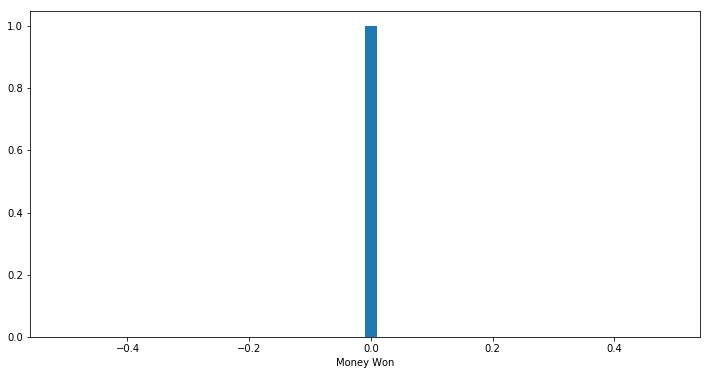

In [318]:
import matplotlib.pyplot as plt
simtourneys = np.load('2015/simtourneys.npy')
test = Syndicate('2015/bracket.pkl')
#test.add('Villanova', paid=55.)
test.plot(simtourneys, pool=944.)

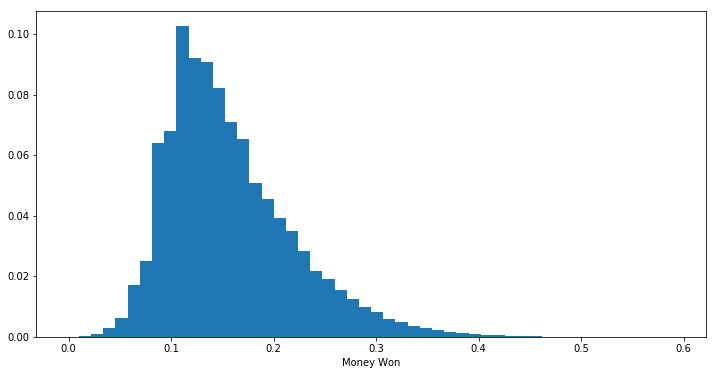

In [315]:
teams = ['Kansas', 'Louisville', 'Maryland', 'Georgetown', 'Wichita St', 'Purdue', 'Oklahoma St', 'Davidson', 'Georgia', 'Texas', 'Buffalo']
jeff = Syndicate('2015/bracket.pkl', teams)
jeff.add('Notre Dame', 0.5)
jeff.to_npy('2015/jeff.npy')
jeff.plot(simtourneys, pool=944.)

In [153]:
teams = ['Oklahoma', 'Iowa St', 'Northern Iowa', 'SMU', 'Michigan St', "St John's", ['Dayton', 'Boise St']]
robbie = Syndicate('2015/bracket.csv', teams)
robbie.add(['Kentucky', 'Wisconsin', 'Duke'], 0.5)
robbie.teams

,Team,TeamID,Fraction Owned
0,Kentucky,1246,0.5
15,Wisconsin,1458,0.5
34,Northern Iowa,1320,1.0
39,Oklahoma,1328,1.0
41,Michigan St,1277,1.0
45,Duke,1181,0.5
47,St John's,1385,1.0
52,SMU,1374,1.0
54,Iowa St,1235,1.0
64,Dayton,1173,1.0


In [154]:
teams = ['Villanova', 'Arizona', 'Virginia', 'Gonzaga', 'Arkansas', 'Utah', 'Ohio St', 'SF Austin', ['BYU', 'Mississippi']] 
mason = Syndicate('2015/bracket.csv', teams)
mason.teams

,Team,TeamID,Fraction Owned
19,Arkansas,1116,1
27,Ohio St,1326,1
28,Arizona,1112,1
30,Villanova,1437,1
43,Virginia,1438,1
48,Utah,1428,1
49,SF Austin,1372,1
58,Gonzaga,1211,1
62,BYU,1140,1
63,Mississippi,1279,1


In [155]:
teams = ['Iowa', 'San Diego St', 'NC State', 'LSU']#, 'Field']
prasad = Syndicate('2015/bracket.csv', teams)
prasad.add(['Kentucky', 'Wisconsin', 'Duke'], 0.5)
prasad.teams

,Team,TeamID,Fraction Owned
0,Kentucky,1246,0.5
15,Wisconsin,1458,0.5
32,NC State,1301,1.0
33,LSU,1261,1.0
45,Duke,1181,0.5
46,San Diego St,1361,1.0
56,Iowa,1234,1.0


In [156]:
teams = ['Baylor', 'North Carolina', 'West Virginia', 'Providence', 'Xavier', 'Butler', 'VA Commonwealth', 'Oregon', 'Cincinnati', 'Indiana', 'UCLA', 'Wyoming', 'Wofford']
raj = Syndicate('2015/bracket.csv', teams)
raj.add(['Notre Dame'], 0.5)
raj.teams

,Team,TeamID,Fraction Owned
1,Cincinnati,1153,1.0
3,West Virginia,1452,1.0
7,Butler,1139,1.0
9,Notre Dame,1323,0.5
12,Indiana,1231,1.0
17,Oregon,1332,1.0
20,Wofford,1459,1.0
21,North Carolina,1314,1.0
23,Xavier,1462,1.0
24,Baylor,1124,1.0
